In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# Load the dataset
url = 'https://raw.githubusercontent.com/vega/vega-datasets/next/data/seattle-weather.csv'
df = pd.read_csv(url)

# Filter the dataset to include only the two most dominant labels
dominant_labels = ['rain', 'sun']
df = df[df['weather'].isin(dominant_labels)]

# Convert the 'date' column to datetime format and extract 'DAY_OF_YEAR'
df['DATE'] = pd.to_datetime(df['date'])
df['DAY_OF_YEAR'] = df['DATE'].dt.dayofyear

df

,date,precipitation,temp_max,temp_min,wind,weather,DATE,DAY_OF_YEAR
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012-01-02,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012-01-03,3
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012-01-04,4
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012-01-05,5
5,2012-01-06,2.5,4.4,2.2,2.2,rain,2012-01-06,6
...,...,...,...,...,...,...,...,...
1455,2015-12-26,0.0,4.4,0.0,2.5,sun,2015-12-26,360
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,2015-12-27,361
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,2015-12-28,362
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,2015-12-30,364


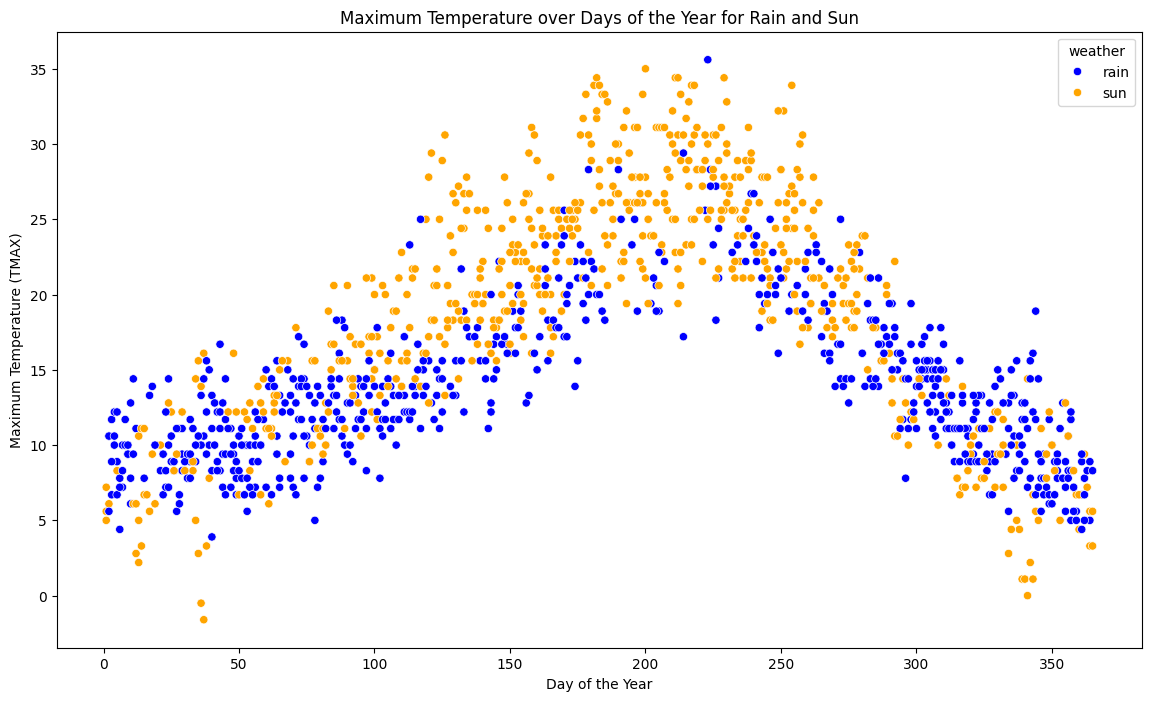

In [4]:
# Plot the maximum temperature over the days of the year for 'rain' and 'sun' weather
plt.figure(figsize=(14, 8))
sns.scatterplot(x='DAY_OF_YEAR', y='temp_max', hue='weather', data=df, palette={'rain': 'blue', 'sun': 'orange'})
plt.title('Maximum Temperature over Days of the Year for Rain and Sun')
plt.xlabel('Day of the Year')
plt.ylabel('Maximum Temperature (TMAX)')
plt.show()

In [5]:
from sklearn.datasets import load_iris
# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features for visualization
y = (iris.target != 0) * 1  # Convert to binary classification problem (Setosa vs. Non-Setosa)

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add a column of ones to X to account for the bias term (intercept)
X_b = np.column_stack([np.ones((X_scaled.shape[0], 1)), X_scaled])

In [7]:
# Initial guess
theta = np.random.randn(X_b.shape[1])
learning_rate = 0.1
n_iterations = 1000
m = len(X_b)
loss_history = []

In [8]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [9]:
# gradient descent
for iterations in range(n_iterations):
    predictions = sigmoid(X_b.dot(theta))
    gradients = 1/m * X_b.T.dot(predictions - y)
    theta = theta - learning_rate * gradients 
    loss = -1/m * (y.dot(np.log(predictions)) + (1 - y).dot(np.log(1 - predictions)))
    loss_history.append(loss)

In [10]:
# Make predictions
y_proba = sigmoid(X_b.dot(theta))
y_pred = (y_proba >= 0.5).astype(int)

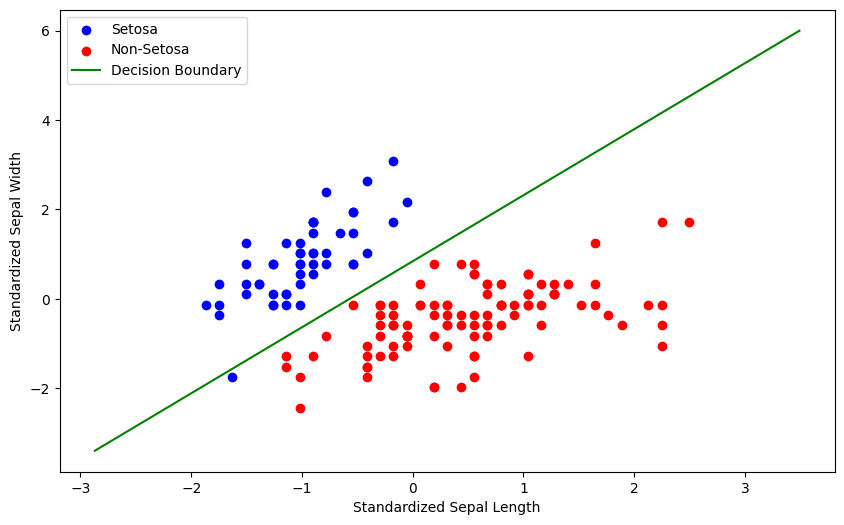

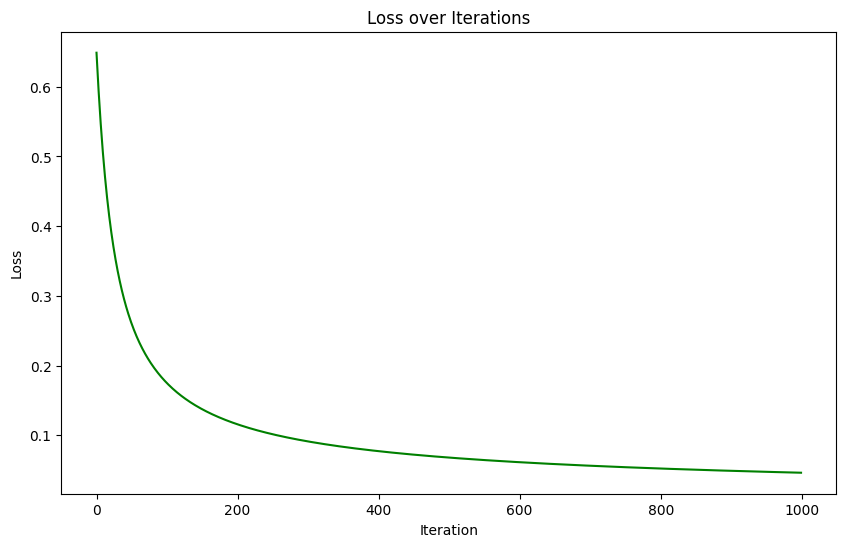

In [11]:
# Function to plot decision boundary
def plot_decision_boundary(X, y, theta):
    plt.figure(figsize=(10, 6))
    
    # Plotting the data points
    plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], color='blue', label='Setosa')
    plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], color='red', label='Non-Setosa')
    
    # Plotting the decision boundary
    x_values = [np.min(X[:, 1] - 1), np.max(X[:, 1] + 1)]
    y_values = -(theta[0] + np.dot(theta[1], x_values)) / theta[2]
    plt.plot(x_values, y_values, label='Decision Boundary', color='green')
    
    plt.xlabel('Standardized Sepal Length')
    plt.ylabel('Standardized Sepal Width')
    plt.legend()
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X_b, y, theta)

# Plot the loss history
plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), loss_history, color='green')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

In [12]:
# Evaluate the model
accuracy = np.mean(y_pred == y)
conf_matrix = pd.crosstab(y, y_pred, rownames=['Actual'], colnames=['Predicted'])
class_report = classification_report(y, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.99
Confusion Matrix:
Predicted   0    1
Actual            
0          49    1
1           0  100
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.99      1.00      1.00       100

    accuracy                           0.99       150
   macro avg       1.00      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [13]:
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data[:, :2]  # Use only the first two features for visualization
y = data.target  # Target variable

# Display the first few rows of the dataset
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [14]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add a column of ones to X to account for the bias term (intercept)
X_b = np.column_stack([np.ones((X_scaled.shape[0], 1)), X_scaled])

In [15]:
# Initialize parameters
theta = np.random.randn(X_b.shape[1])  
learning_rate = 0.1
n_iterations = 1000
m = len(X_b)
loss_history = []

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient descent
for iteration in range(n_iterations):
    predictions = sigmoid(X_b.dot(theta))
    gradients = 1/m * X_b.T.dot(predictions - y)
    theta = theta - learning_rate * gradients
    loss = -1/m * (y.dot(np.log(predictions)) + (1 - y).dot(np.log(1 - predictions)))
    loss_history.append(loss)

# Make predictions
y_proba = sigmoid(X_b.dot(theta))
y_pred = (y_proba >= 0.5).astype(int)

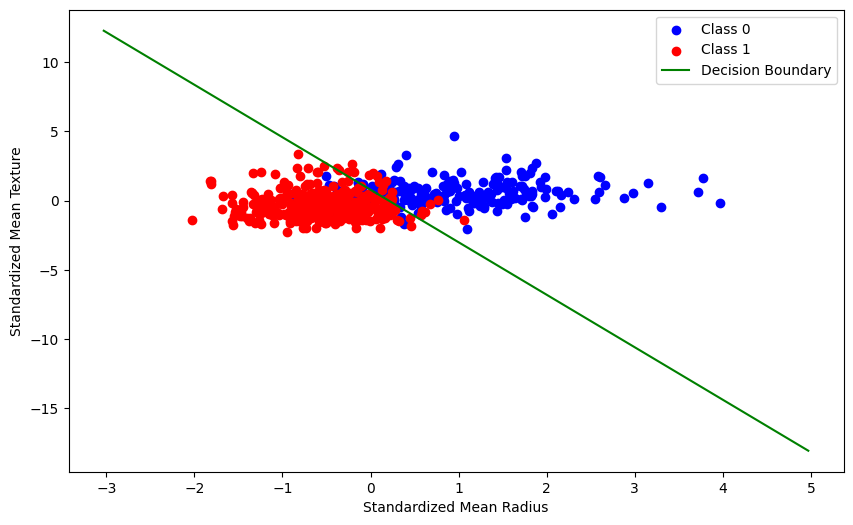

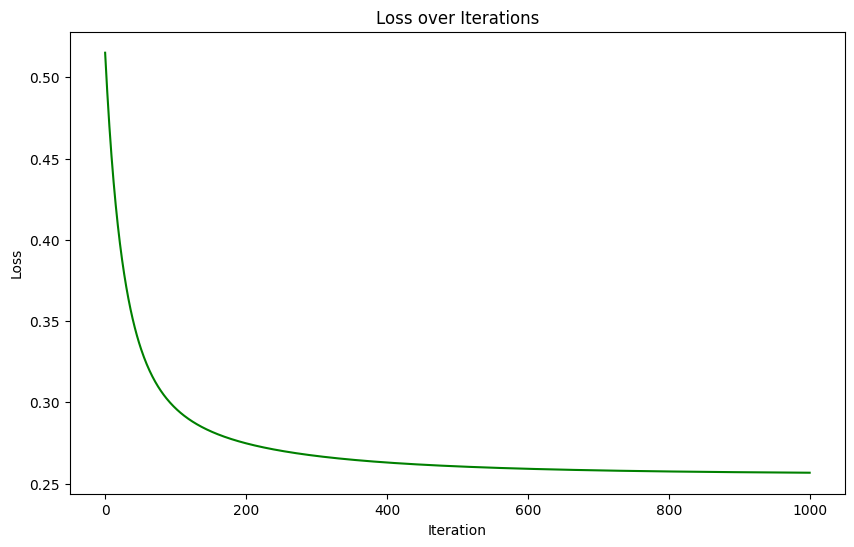

In [16]:
# Function to plot decision boundary
def plot_decision_boundary(X, y, theta):
    plt.figure(figsize=(10, 6))
    
    # Plotting the data points
    plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], color='blue', label='Class 0')
    plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], color='red', label='Class 1')
    
    # Plotting the decision boundary
    x_values = [np.min(X[:, 1] - 1), np.max(X[:, 1] + 1)]
    y_values = -(theta[0] + np.dot(theta[1], x_values)) / theta[2]
    plt.plot(x_values, y_values, label='Decision Boundary', color='green')
    
    plt.xlabel('Standardized Mean Radius')
    plt.ylabel('Standardized Mean Texture')
    plt.legend()
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X_b, y, theta)

# Plot the loss history
plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), loss_history, color='green')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

In [17]:
# Evaluate the model
accuracy = np.mean(y_pred == y)
conf_matrix = pd.crosstab(y, y_pred, rownames=['Actual'], colnames=['Predicted'])
class_report = classification_report(y, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.89
Confusion Matrix:
Predicted    0    1
Actual             
0          173   39
1           22  335
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       212
           1       0.90      0.94      0.92       357

    accuracy                           0.89       569
   macro avg       0.89      0.88      0.88       569
weighted avg       0.89      0.89      0.89       569



In [18]:
# Load the Titanic dataset
url = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
df = pd.read_csv(url)

# Display the first few rows of the dataset to verify the columns
print(df.head())

   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  


In [19]:
# Handle missing values
df = df.dropna(subset=['Age', 'Fare', 'Survived'])

# Convert categorical variable 'Sex' to numerical
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Select relevant features and the target variable
features = ['Pclass', 'Sex', 'Age', 'Fare']
X = df[features].values
y = df['Survived'].values

In [20]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add a column of ones to X to account for the bias term (intercept)
X_b = np.column_stack([np.ones((X_scaled.shape[0], 1)), X_scaled])

In [21]:
# Initialize parameters
theta = np.random.randn(X_b.shape[1])  
learning_rate = 0.1
n_iterations = 1000
m = len(X_b)
loss_history = []

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient descent
for iteration in range(n_iterations):
    predictions = sigmoid(X_b.dot(theta))
    gradients = 1/m * X_b.T.dot(predictions - y)
    theta = theta - learning_rate * gradients
    loss = -1/m * (y.dot(np.log(predictions)) + (1 - y).dot(np.log(1 - predictions)))
    loss_history.append(loss)

# Make predictions
y_proba = sigmoid(X_b.dot(theta))
y_pred = (y_proba >= 0.5).astype(int)

In [22]:
# Evaluate the model
accuracy = np.mean(y_pred == y)
conf_matrix = confusion_matrix(y, y_pred)
class_report = classification_report(y, y_pred, zero_division=0)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.80
Confusion Matrix:
[[464  81]
 [ 98 244]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       545
           1       0.75      0.71      0.73       342

    accuracy                           0.80       887
   macro avg       0.79      0.78      0.78       887
weighted avg       0.80      0.80      0.80       887



In [23]:
# Create synthetic data for Jack and Rose
synthetic_data = pd.DataFrame({
    'Pclass': [3, 1],
    'Sex': [0, 1],  # Male is 0, Female is 1
    'Age': [20, 17],
    'Fare': [5.0, 100.0]
}, index=['Jack', 'Rose'])
synthetic_data

,Pclass,Sex,Age,Fare
Jack,3,0,20,5.0
Rose,1,1,17,100.0


In [24]:
# Ensure the synthetic data has the same feature order
X_synthetic = synthetic_data[features].values

# Standardize the synthetic features
X_synthetic_scaled = scaler.transform(X_synthetic)

# Add a column of ones to X to account for the bias term (intercept)
X_synthetic_b = np.column_stack([np.ones((X_synthetic_scaled.shape[0], 1)), X_synthetic_scaled])

# Make predictions for Jack and Rose
y_synthetic_proba = sigmoid(X_synthetic_b.dot(theta))
y_synthetic_pred = (y_synthetic_proba >= 0.5).astype(int)

In [25]:
# Print the results
predictions = pd.DataFrame({
    'Passenger': ['Jack', 'Rose'],
    'Survived_Probability': y_synthetic_proba,
    'Survived_Prediction': y_synthetic_pred
}, index=['Jack', 'Rose'])

print(predictions)

     Passenger  Survived_Probability  Survived_Prediction
Jack      Jack              0.110555                    0
Rose      Rose              0.955072                    1


Accuracy: 0.75
Confusion Matrix:
[[548  93]
 [233 407]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       641
           1       0.81      0.64      0.71       640

    accuracy                           0.75      1281
   macro avg       0.76      0.75      0.74      1281
weighted avg       0.76      0.75      0.74      1281



c:\Users\Ankit\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


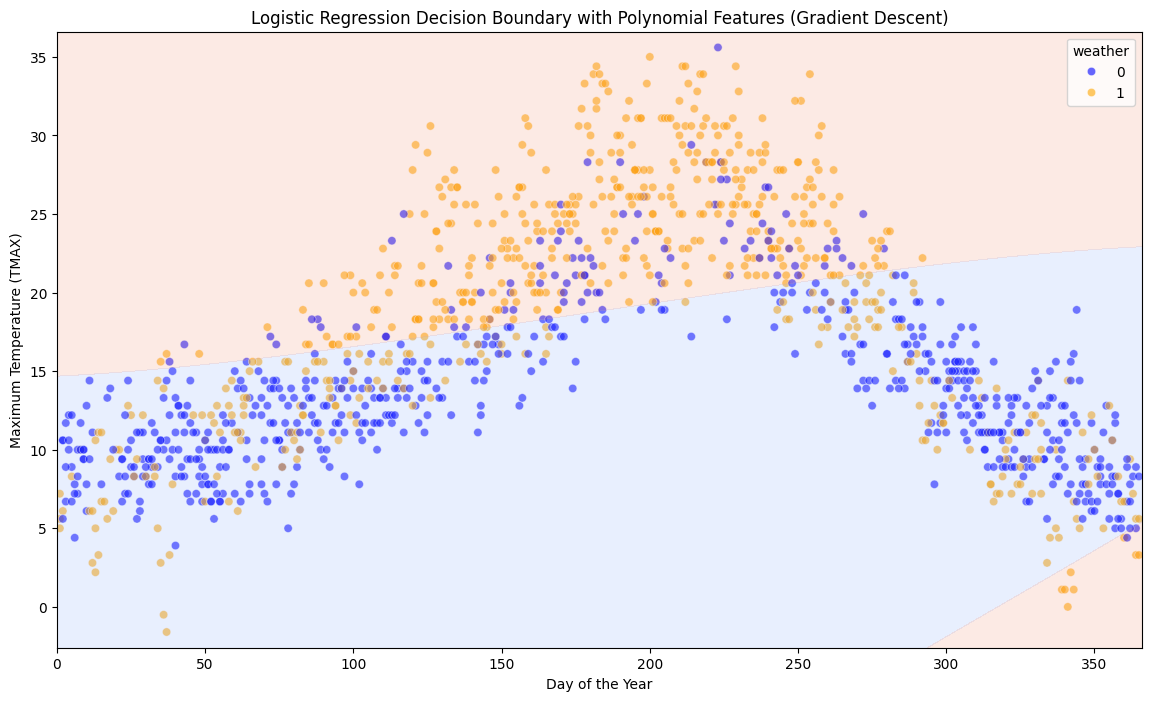

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
url = 'https://raw.githubusercontent.com/vega/vega-datasets/next/data/seattle-weather.csv'
df = pd.read_csv(url)

# Filter the dataset to include only the two most dominant labels
dominant_labels = ['rain', 'sun']
df = df[df['weather'].isin(dominant_labels)]

# Convert the 'date' column to datetime format and extract 'DAY_OF_YEAR'
df['DATE'] = pd.to_datetime(df['date'])
df['DAY_OF_YEAR'] = df['DATE'].dt.dayofyear

# Convert 'weather' to numerical labels
df['weather'] = df['weather'].map({'rain': 0, 'sun': 1})

# Select features and target
X = df[['DAY_OF_YEAR', 'temp_max']]
y = df['weather'].values

# Create polynomial features
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Add a column of ones to X to account for the bias term (intercept)
X_b = np.column_stack([np.ones((X_poly_scaled.shape[0], 1)), X_poly_scaled])

# Initialize parameters
theta = np.random.randn(X_b.shape[1])  # Random initialization
learning_rate = 0.1
n_iterations = 1000
m = len(X_b)
loss_history = []

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient descent
for iteration in range(n_iterations):
    predictions = sigmoid(X_b.dot(theta))
    gradients = 1/m * X_b.T.dot(predictions - y)
    theta = theta - learning_rate * gradients
    loss = -1/m * (y.dot(np.log(predictions)) + (1 - y).dot(np.log(1 - predictions)))
    loss_history.append(loss)

# Make predictions
y_proba = sigmoid(X_b.dot(theta))
y_pred = (y_proba >= 0.5).astype(int)

# Evaluate the model
accuracy = np.mean(y_pred == y)
conf_matrix = confusion_matrix(y, y_pred)
class_report = classification_report(y, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot the decision boundary
plt.figure(figsize=(14, 8))
sns.scatterplot(x='DAY_OF_YEAR', y='temp_max', hue='weather', data=df, palette={0: 'blue', 1: 'orange'}, alpha=0.6)

# Create a mesh grid for plotting decision boundary
x_min, x_max = X['DAY_OF_YEAR'].min() - 1, X['DAY_OF_YEAR'].max() + 1
y_min, y_max = X['temp_max'].min() - 1, X['temp_max'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
X_mesh = np.c_[xx.ravel(), yy.ravel()]

# Transform and standardize the mesh grid data
X_mesh_poly = poly.transform(X_mesh)
X_mesh_poly_scaled = scaler.transform(X_mesh_poly)
X_mesh_b = np.column_stack([np.ones((X_mesh_poly_scaled.shape[0], 1)), X_mesh_poly_scaled])

# Predict the decision boundary
Z = sigmoid(X_mesh_b.dot(theta))
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm', levels=[0, 0.5, 1])

plt.title('Logistic Regression Decision Boundary with Polynomial Features (Gradient Descent)')
plt.xlabel('Day of the Year')
plt.ylabel('Maximum Temperature (TMAX)')
plt.show()